Anomalieerkennung in Finanzmarktdaten

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import seaborn as sns
import Builder

%matplotlib inline

In [32]:
sns.set_style('whitegrid')
sns.set_context('notebook',font_scale=1)

In [33]:
data = Builder.buildMertonDF()

In [34]:
data

,Merton Jump,Jumps plot,Jumps,Return log,RV,BPV,Diff,Anomaly Returns IF,Anomaly RV IF,Anomaly Diff IF
2,0.964134,0.0,1,-0.010308,0.000367,0.000380,-0.000014,1,1,1
3,0.957070,0.0,1,-0.007354,0.000160,0.000190,-0.000030,1,1,1
4,0.951205,0.0,1,-0.006146,0.000092,0.000183,-0.000091,1,1,1
5,0.962295,0.0,1,0.011591,0.000172,0.000291,-0.000119,1,1,1
6,0.971823,0.0,1,0.009853,0.000231,0.000296,-0.000064,1,1,1
...,...,...,...,...,...,...,...,...,...,...
994,0.405129,0.0,1,-0.015629,0.000714,0.001106,-0.000392,1,1,1
995,0.414715,0.0,1,0.023386,0.000791,0.001189,-0.000398,1,1,1
996,0.407832,0.0,1,-0.016735,0.000827,0.001079,-0.000252,1,1,1
997,0.415091,0.0,1,0.017643,0.000591,0.000787,-0.000196,1,1,1


In [35]:
pct,subset = Builder.subset(data)

3 von 8 Anomalien wurden erkannt -> 38.0 % IF contamin: 8



Inlier Prediction: +1
Outlier Prediction: -1


In [36]:
subset

,Jumps,Anomaly Diff IF
64,-1,1
211,-1,1
270,-1,1
271,1,-1
542,-1,1
551,-1,-1
552,1,-1
595,-1,-1
596,1,-1
815,1,-1


In [37]:
print('data: ',f1_score(data['Jumps'],data['Anomaly Diff IF'], pos_label=-1))
print('subset', f1_score(subset['Jumps'],subset['Anomaly Diff IF'], pos_label=-1))

data:  0.375
subset 0.375


In [38]:
# plots

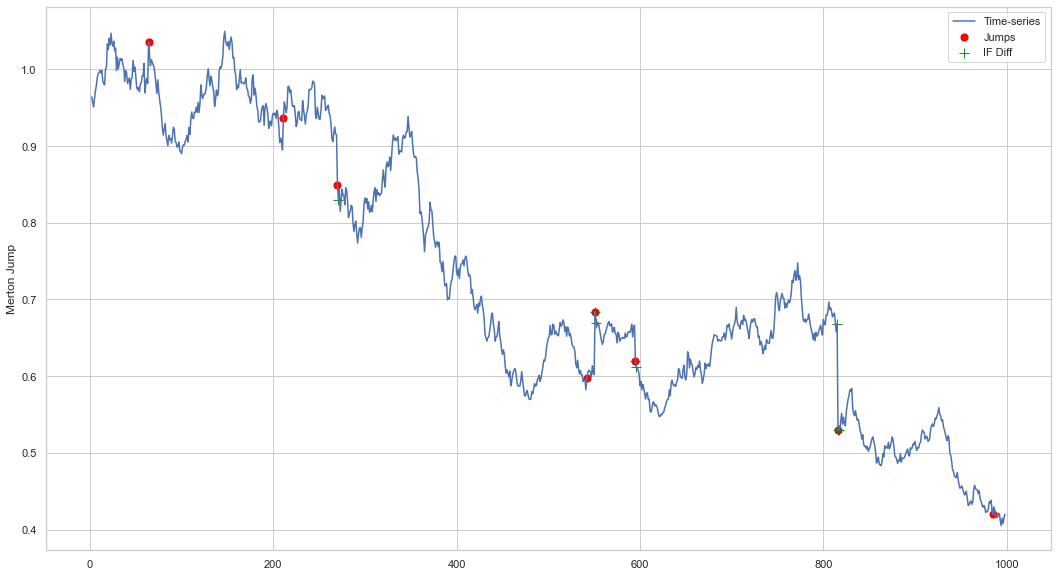

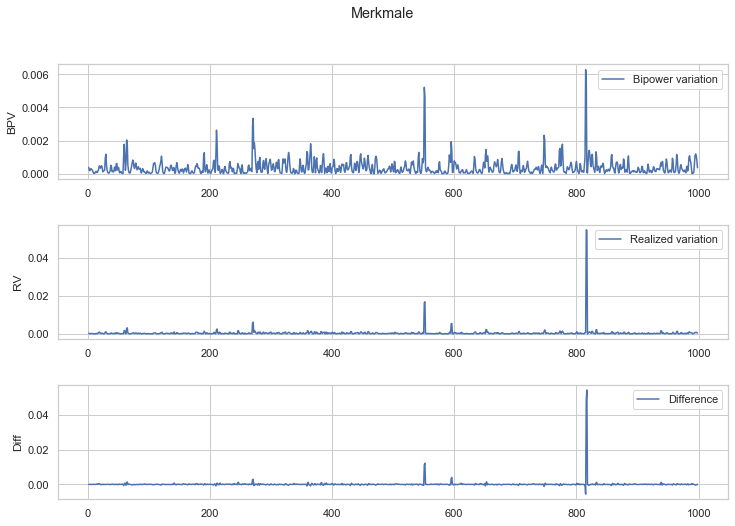

In [39]:
Builder.plotter(data)


Jump rate that is tested in all algorithms where steps used are 10 000.
jumps/steps| 0.0002 |0.001| 0.002| 0.005| 0.01| 0.02

In [40]:
subset = data.loc[(data['Anomaly Diff IF']==-1)]
subset['Merton Jump']

271    0.829237
551    0.684024
552    0.669031
595    0.619876
596    0.612384
815    0.668353
816    0.529474
817    0.529604
Name: Merton Jump, dtype: float64